In [1]:
# Importing the necessary libraries

import lyricsgenius as genius
import pandas as pd
import string 
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import numpy as np
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
import nltk.data
import time   

from requests.exceptions import Timeout # To avoid timeout errors during pull
nltk.download('vader_lexicon')
nltk.download('punkt')



import lyricsgenius as genius
import pandas as pd
import string 

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
#nltk.download('stopwords')
#nltk.download('wordnet')   

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dogan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Dogan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Reloading the data
df_all = pd.read_csv('lyrics_all.csv', sep='%')
df_upd = pd.read_csv('lyrics_data.csv', sep='%')
df_all = df_all.drop('Unnamed: 0', 1)
df_upd = df_upd.drop('Unnamed: 0', 1)

In [3]:
# Getting the DataFrame for Visalizations
df_v = pd.DataFrame()
df_v['Artist'] = df_upd['Artist']
df_v['Title'] = df_upd['Title']
df_v['Year'] = df_upd['Year']
df_v['Decade'] = df_upd['Decade']
df_v['Lyrics'] = df_upd['Lyrics']

In [4]:
df_v

,Artist,Title,Year,Decade,Lyrics
0,Nirvana,Smells Like Teen Spirit,1991,90s,"load up on guns, bring your friends it's fun..."
1,Led Zeppelin,Stairway to Heaven,1971,70s,there's a lady who's sure all that glitte...
2,Queen,Bohemian Rhapsody,1975,70s,is this the real life? is this just fantasy?...
3,John Lennon,Imagine,1971,70s,imagine there's no heaven it's easy if you t...
4,The Rolling Stones,(I Can't Get No) Satisfaction,1965,60s,i can't get no satisfaction i can't get n...
...,...,...,...,...,...
5367,King Gizzard & The Lizard Wizard,The River,2015,10s,once you're in the zone the river flows down...
5368,King Gizzard & The Lizard Wizard,I'm In Your Mind,2014,10s,everybody's lazy when they're tired 'cause e...
5369,King Gizzard & The Lizard Wizard,Cellophane,2014,10s,"do do do do, do do do do do do do do do do d..."
5370,King Gizzard & The Lizard Wizard,Hot Water,2014,10s,"water, hot water hot water, hot water hot wa..."


### Word Cloud with respect to decades

In [5]:
#Functions for tokenization
#Also does lemmatization to each word
def lyrics_to_words(document):

    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized


In [6]:
def unique(list1): 
     # intilize a null list 
    unique_list = [] 
      
    # traverse for all elements 
    for x in list1: 
        # check if exists in unique_list or not 
        if x not in unique_list: 
            unique_list.append(x) 
    
    return unique_list

In [7]:
#Stores unique words of each lyrics into a new column called words 

#list used to store the words
words = []
#iterate trought each lyric and split unique words appending the result into the words list
df_v = df_v.reset_index(drop=True)
for word in df_v['Lyrics'].tolist():
    words.append(unique(lyrics_to_words(word).split()))

#create the new column with the information of words lists 
df_v['Words'] = words
df_v

,Artist,Title,Year,Decade,Lyrics,Words
0,Nirvana,Smells Like Teen Spirit,1991,90s,"load up on guns, bring your friends it's fun...","[load, gun, bring, friend, fun, lose, pretend,..."
1,Led Zeppelin,Stairway to Heaven,1971,70s,there's a lady who's sure all that glitte...,"[there, lady, who, sure, glitter, gold, buying..."
2,Queen,Bohemian Rhapsody,1975,70s,is this the real life? is this just fantasy?...,"[real, life, fantasy, caught, landslide, escap..."
3,John Lennon,Imagine,1971,70s,imagine there's no heaven it's easy if you t...,"[imagine, there, heaven, easy, try, hell, u, s..."
4,The Rolling Stones,(I Can't Get No) Satisfaction,1965,60s,i can't get no satisfaction i can't get n...,"[cant, get, satisfaction, cause, try, no, im, ..."
...,...,...,...,...,...,...
5367,King Gizzard & The Lizard Wizard,The River,2015,10s,once you're in the zone the river flows down...,"[zone, river, flow, like, full, stone, water, ..."
5368,King Gizzard & The Lizard Wizard,I'm In Your Mind,2014,10s,everybody's lazy when they're tired 'cause e...,"[everybodys, lazy, theyre, tired, cause, sucki..."
5369,King Gizzard & The Lizard Wizard,Cellophane,2014,10s,"do do do do, do do do do do do do do do do d...","[do, watch, movie, 3d, strange, cellophane, oh..."
5370,King Gizzard & The Lizard Wizard,Hot Water,2014,10s,"water, hot water hot water, hot water hot wa...","[water, hot, eat, up, vomit, date, line, repay..."


In [23]:
# The visualisation functions will take the most popular 500 songs into account since analyzing all cannot be fitted into the memory
df_v2 = df_v.iloc[:500,:]

In [24]:
df_v2

,Artist,Title,Year,Decade,Lyrics,Words
0,Nirvana,Smells Like Teen Spirit,1991,90s,"load up on guns, bring your friends it's fun...","[load, gun, bring, friend, fun, lose, pretend,..."
1,Led Zeppelin,Stairway to Heaven,1971,70s,there's a lady who's sure all that glitte...,"[there, lady, who, sure, glitter, gold, buying..."
2,Queen,Bohemian Rhapsody,1975,70s,is this the real life? is this just fantasy?...,"[real, life, fantasy, caught, landslide, escap..."
3,John Lennon,Imagine,1971,70s,imagine there's no heaven it's easy if you t...,"[imagine, there, heaven, easy, try, hell, u, s..."
4,The Rolling Stones,(I Can't Get No) Satisfaction,1965,60s,i can't get no satisfaction i can't get n...,"[cant, get, satisfaction, cause, try, no, im, ..."
...,...,...,...,...,...,...
495,Everclear,Santa Monica,1995,90s,i am still living with your ghost lonely and...,"[still, living, ghost, lonely, dreaming, west,..."
496,a-ha,Take on Me,1985,80s,we're talking away i don't know what i'm to ...,"[were, talking, away, know, im, say, ill, anyw..."
497,Roy Orbison,Crying,1962,60s,i was alright for awhile i could smile for awh...,"[alright, awhile, could, smile, saw, last, nig..."
498,David Bowie,Rebel Rebel,1974,70s,doo doo doo-doo doo doo-doo doo doo doo doo-...,"[doo, doodoo, got, mother, whirl, sure, boy, g..."


In [25]:
#Create a new dataframe of all the  words used in lyrics and its decades 

#list used to store the information
set_words = []
set_decades = []

#Iterate trought each word and decade and stores them into the new lists
for i in df_v2.index:
    for word in df_v2['Words'].iloc[i]:
        set_words.append(word)
        set_decades.append(df_v2['Decade'].iloc[i])

#create the new data frame  with the information of words and decade lists 
words_df = pd.DataFrame({'Words':set_words,'Decade':set_decades})

In [26]:
words_df

,Words,Decade
0,load,90s
1,gun,90s
2,bring,90s
3,friend,90s
4,fun,90s
...,...,...
68918,old,60s
68919,age,60s
68920,wisdom,60s
68921,no,60s


In [27]:
#Defined  your own Stopwords in case the clean data function does not remove all of them
stop_words = ['verse','im','get','1000','58','60','80','youre','youve',
               'guitar','solo','instrumental','intro','pre',"3","yo","yeah", "oh", "na", "la", "ive"]

# count the frequency of each word that don't have on the stop_words lists          
cv = CountVectorizer(stop_words=stop_words)

#Create a dataframe called data_cv to store the the number of times the word was used in  a lyric based their decades
text_cv = cv.fit_transform(words_df['Words'].iloc[:])
data_cv = pd.DataFrame(text_cv.toarray(),columns=cv.get_feature_names())
data_cv['Decade'] = words_df['Decade']

#created a dataframe that Sums the ocurrence frequency of each word and group the result by decade
vect_words = data_cv.groupby('Decade').sum().T
vect_words = vect_words.reset_index(level=0).rename(columns ={'index':'words'})
vect_words = vect_words.rename_axis(columns='')

#Save the data into a csv file
vect_words.to_csv('words.csv',index=False)

#change the order of columns to order from the oldest to actual decade
vect_words = vect_words[['words', '60s','70s','80s','90s','00s','10s', '20s']]

### Word Cloud and Frequent Words

In [35]:
def plot_wordcloud(df,row,col):
    wc = WordCloud( background_color="white",colormap="Dark2",max_font_size=100,random_state=15)

    fig = plt.figure(figsize=(20,10))
    
    for index, value in enumerate(df.columns[1:]):

        top_dict = dict(zip(df['words'].tolist(),df[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=15) 

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()

def words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_news = []
    years = []
    for value in df.columns[1:]:
         unique_words.append(np.count_nonzero(df[value]))
         total_words.append(sum(df[value]))
         years.append(str(value))
         total_news.append(main_df['Decade'][main_df['Decade']==value].count())
    
    data = pd.DataFrame({'decade':years,'unique words':unique_words,'total words':total_words,'total songs':total_news})
    data['words per songs'] = round(data['total words'] / data['total songs'],0)
    data['words per songs'] = data['words per songs'].astype('int')
    return data

def plot_freq_words(df,decade,n_words):
    
    top_words_2020 = df.sort_values([decade],ascending=False).head(n_words)

    fig = plt.figure(figsize=(15,8))
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[1]])
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[2]])
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[3]])
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[4]])
    plt.plot(top_words_2020['words'],top_words_2020[df.columns[5]])

    plt.legend(df.columns[1:].tolist())
    plt.title(f"Most frequent words in {decade} compared with other decades",fontsize=14)
    plt.xlabel(f'Most Frequent Words of {decade}',fontsize=12)
    plt.ylabel('Frecuency',fontsize=12)
    plt.xticks(fontsize=12,rotation=20)
    plt.yticks(fontsize=12)
    plt.savefig("lineplot.png",format="png", bbox_inches='tight')
    plt.show()

In [36]:
words_stats(vect_words,df_v2)

,decade,unique words,total words,total songs,words per songs
0,60s,1828,4525,81,56
1,70s,6567,15607,151,103
2,80s,2059,4693,75,63
3,90s,4481,8260,98,84
4,00s,10894,15568,73,213
5,10s,2680,3105,10,310
6,20s,10926,15796,8,1974


In [52]:
vect_words

,words,60s,70s,80s,90s,00s,10s,20s
0,001,0,0,0,0,0,0,1
1,0102,0,0,0,1,0,0,0
2,0104,0,0,0,1,0,0,0
3,0125inchapter,0,0,0,0,0,0,1
4,02,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
22752,éric,0,0,0,1,0,0,0
22753,étienne,0,0,0,1,0,0,0
22754,étoiles,0,0,0,1,0,0,0
22755,êtesvous,0,0,0,1,0,0,0


In [71]:
def plot_wordcloud(df,row,col):
    wc = WordCloud( background_color="white",colormap="Dark2",max_font_size=100,random_state=15)

    fig = plt.figure(figsize=(35,35))
    
    for index, value in enumerate(df.columns[1:]):

        top_dict = dict(zip(df['words'].tolist(),df[value].tolist()))
        wc.generate_from_frequencies(top_dict)
        plt.subplot(row,col,index+1)
        plt.imshow(wc,interpolation="bilinear")
        plt.axis("off")
        plt.title(f"{value}",fontsize=30) 

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()


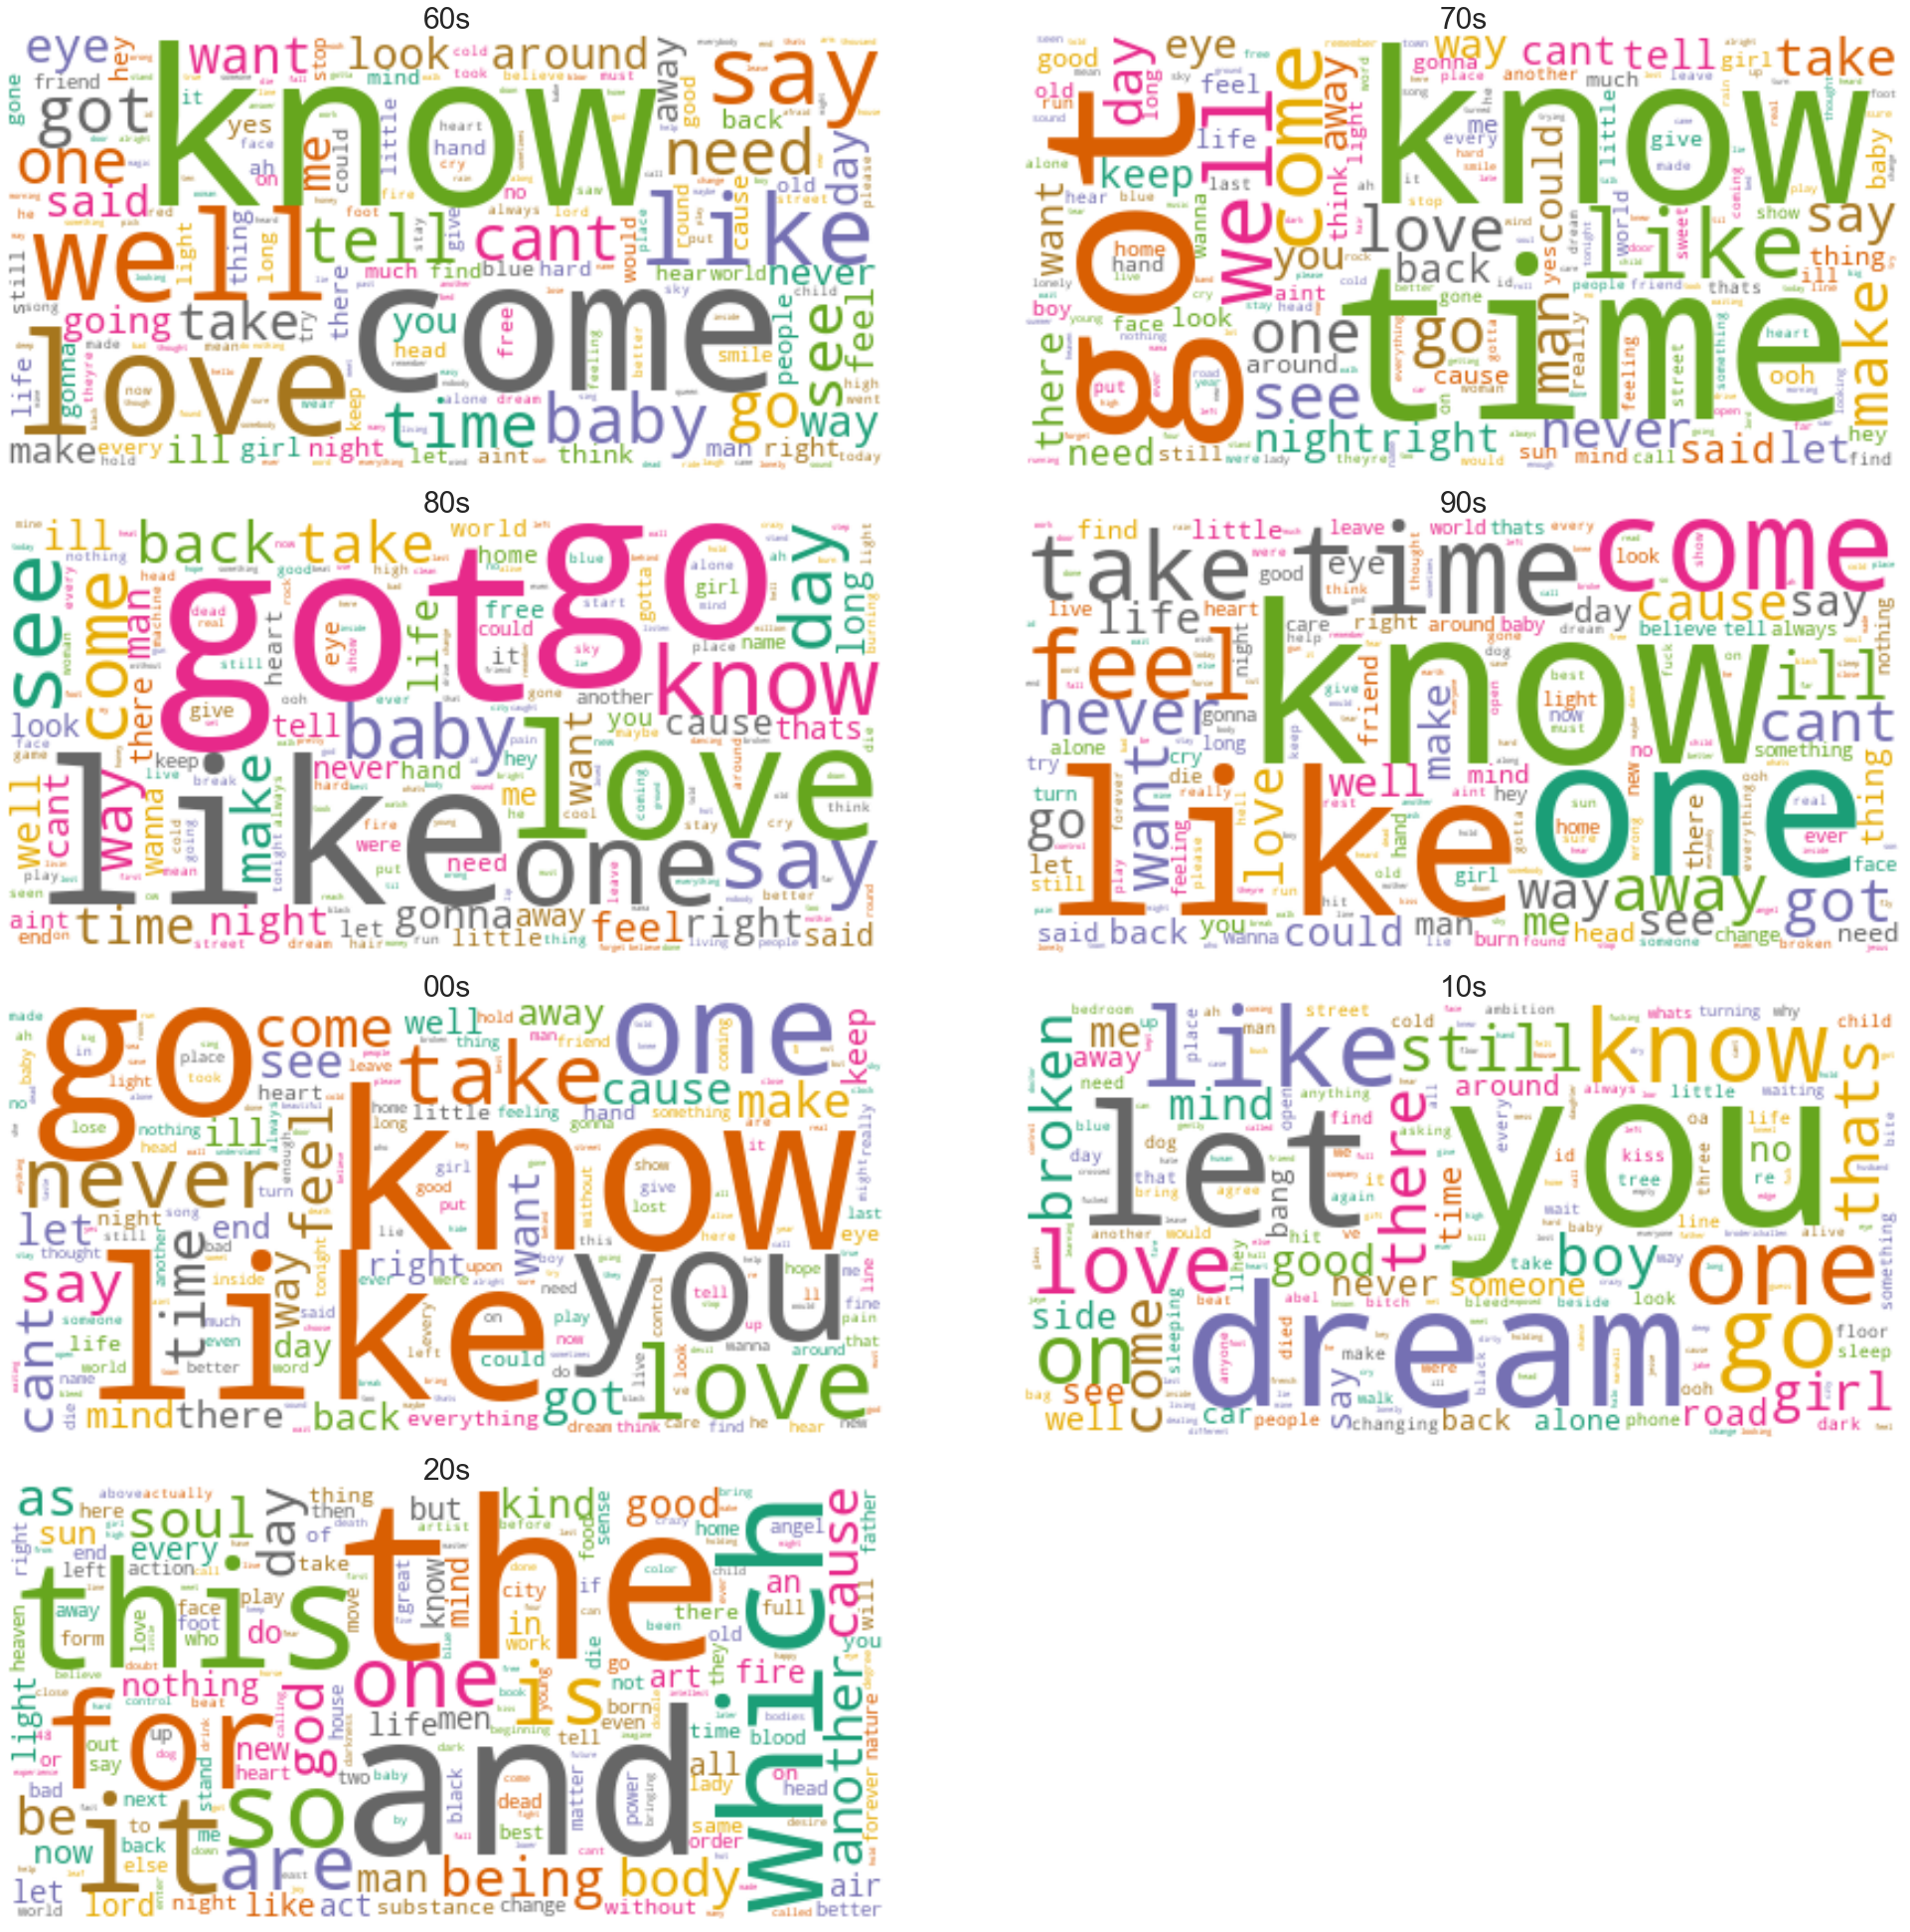

In [72]:
plot_wordcloud(vect_words, 4, 2)

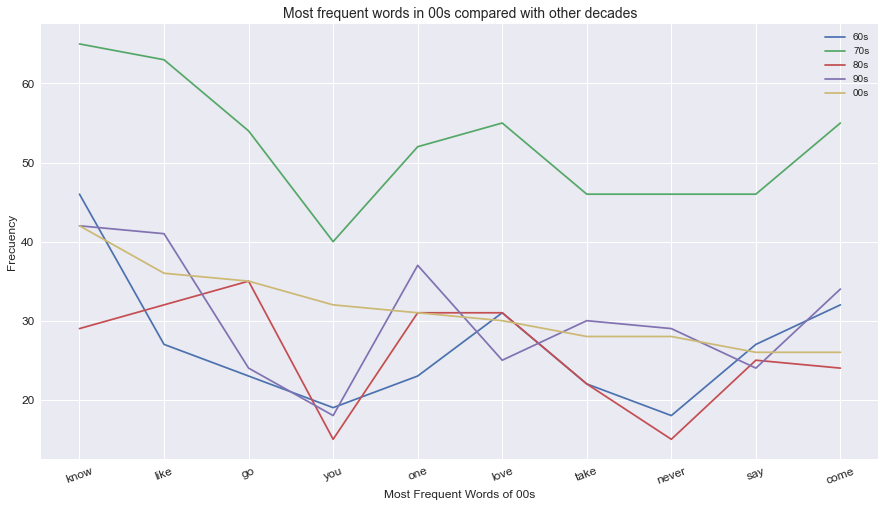

In [73]:
plot_freq_words(vect_words,'00s',10)

### Sentiment Scores by Decades

In [74]:
reqcols=["name","decade", "cleaned lyrics","negative", "positive", "neutral", "compound"]                                                                                 
df2= df_all.reindex(reqcols,axis="columns") 

In [75]:
df = df2.iloc[:,:]

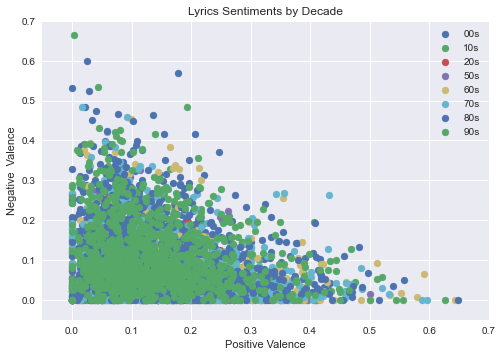

In [76]:

for name, group in df.groupby('decade'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend(fontsize=10)

plt.xlim([-0.05,0.7])
plt.ylim([-0.05,0.7])

plt.title("Lyrics Sentiments by Decade")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')
plt.show()

In [77]:
means_df = df.groupby(['decade']).mean()
means_df

,negative,positive,neutral,compound
decade,,,,
00s,0.110767,0.131247,0.757981,0.164480
10s,0.099909,0.139722,0.760392,0.274336
20s,0.082563,0.122345,0.795057,0.381470
50s,0.070055,0.176964,0.752964,0.490664
60s,0.086651,0.163953,0.749379,0.426343
70s,0.079376,0.149476,0.770176,0.433327
80s,0.092892,0.147685,0.759396,0.318496
90s,0.107399,0.133406,0.759201,0.166620


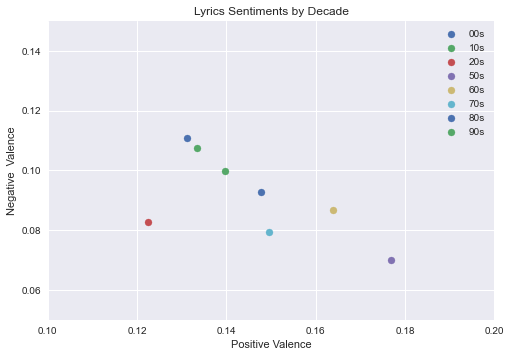

In [83]:
for name, group in means_df.groupby('decade'):
    plt.scatter(group['positive'],group['negative'],label=name)
    plt.legend()

plt.xlim([0.1,0.2])
plt.ylim([0.05,0.15])
plt.title("Lyrics Sentiments by Decade")
plt.xlabel('Positive Valence')
plt.ylabel('Negative  Valence')

plt.show()

### Energy Scores by Years

In [85]:
df_all = pd.read_csv('df_all_e.csv', sep='%')
df_all = df_all.drop('Unnamed: 0', 1)
df_all

In [91]:
df11 = df_all.groupby(['release_date'])['energy'].mean().reset_index()
df11

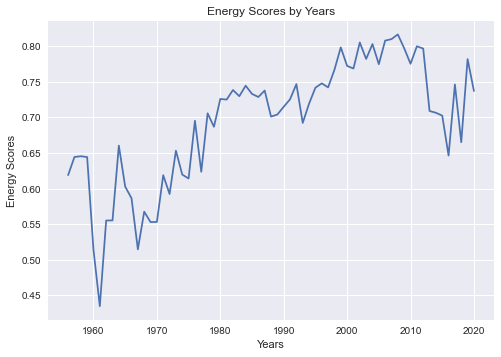

In [94]:
plt.plot(df11["release_date"], df11["energy"])
plt.title("Energy Scores by Years")
plt.xlabel('Years')
plt.ylabel('Energy Scores')
plt.show()